# Problem Set 3

## Directions

1. Show all work/steps/calculations using a combination of code and Markdown. You will submit only this notebook named: [jhed_id].ipynb back to Blackboard from whence you downloaded it. Do not return the data to me.
2. **All** work is to be your own. This is not a group project. You may, however, use code from the lectures and labs. Provide citations for any code that is not your own. You may also consult Stackoverflow, etc. This is not by any means "closed book" or anything like that. Basically, I need to see if *you* learned the concepts from the Lectures, *Fundamentals*, and Labs.
3. Add whatever markdown or code cells you need in each part to explain and calculate your answers. Don't just provide answers but explain them as well. **Explain and interpret your results.**

## Abalone

This is a problem about Abalone...but not really. You should be able to use common knowledge to work with the data in this problem.

```
Description of fields in abalone data.

Name            Data Type    Meas.    Description
----            ---------    -----    -----------
Sex             nominal               M, F, and I (infant)
Length          continuous    mm      Longest shell measurement
Diameter        continuous    mm      perpendicular to length
Height          continuous    mm      with meat in shell
Whole weight    continuous    grams   whole abalone
Shucked weight  continuous    grams   weight of meat
Viscera weight  continuous    grams   gut weight (after bleeding)
Shell weight    continuous    grams   after being dried
Rings           integer               +1.5 gives the age in years
```

The target variable is Rings because it is a predictor of age. You can take this as your problem, "How do we estimate the age of an abalone from the available data?"

At a high level you have:

1. Question/Problem
2. ETL
3. EDA
4. Statistical and Mathematical Modeling.

Of necessity, there is very little ETL here except to verify that the data has loaded correctly and with the correct types. For the EDA and Modeling parts, follow the guidelines in *Fundamentals*.


**Begin**

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="darkgrid")

# Verify that the data has loaded correctly

In [2]:
import pandas as pd

abalone_data = pd.read_csv("abalone.original.csv",header=None,names = ['Sex','Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight','Rings'])

abalone_data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,91,73,19,102.8,44.9,20.2,30.0,15
1,M,70,53,18,45.1,19.9,9.7,14.0,7
2,F,106,84,27,135.4,51.3,28.3,42.0,9
3,M,88,73,25,103.2,43.1,22.8,31.0,10
4,I,66,51,16,41.0,17.9,7.9,11.0,7


# EDA

### Rings
1. The target "Rings" is a numeric variable. We would like to check its mean, median, and distribution 
2. The "Rings" follow a normal distribution, and I could barely see any skewness. 

In [3]:
abalone_data.Rings.describe()

count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64

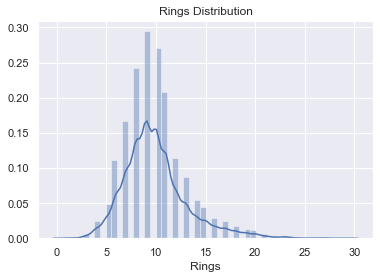

In [4]:
sns.distplot(abalone_data.Rings).set_title("Rings Distribution");

### Length

The "Lengh" does not follow normal distribution. It is negatively skewed. 

In [12]:
abalone_data.Length.describe()

count    4177.000000
mean      104.798420
std        24.018583
min        15.000000
25%        90.000000
50%       109.000000
75%       123.000000
max       163.000000
Name: Length, dtype: float64

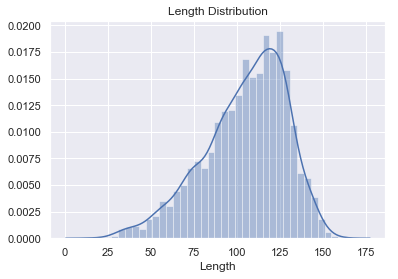

In [5]:
sns.distplot(abalone_data.Length).set_title("Length Distribution");

The "Lengh" does not follow normal distribution. It is negatively skewed. 

### Diameter

The "Diameter" does not follow normal distribution. It is negatively skewed. 

In [13]:
abalone_data.Diameter.describe()

count    4177.000000
mean       81.576251
std        19.847973
min        11.000000
25%        70.000000
50%        85.000000
75%        96.000000
max       130.000000
Name: Diameter, dtype: float64

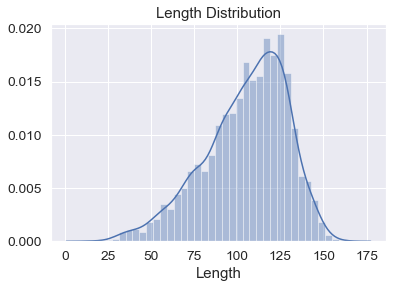

In [14]:
sns.distplot(abalone_data.Length).set_title("Diameter Distribution");

### Whole_weight

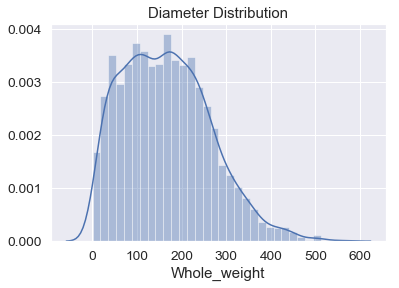

In [15]:
sns.distplot(abalone_data.Whole_weight).set_title("Diameter Distribution");

### Sex

Text(0.5,1,'Sex Distribution')

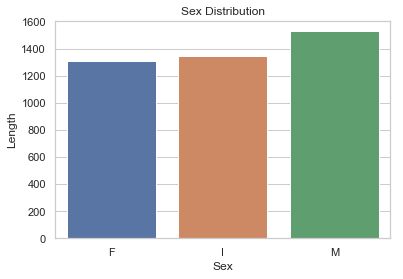

In [6]:
sex = abalone_data.groupby("Sex").count()
sns.set(style="whitegrid") 
sns.barplot(x=sex.index, y=sex.Length, data=sex).set_title("Sex Distribution")

# The correlation between Rings and other variables

### Rings v. categorical variables

Multiple Box Plot to show the relationship between Sex and Rings

The Rings of Infants are significantly lower than others. 

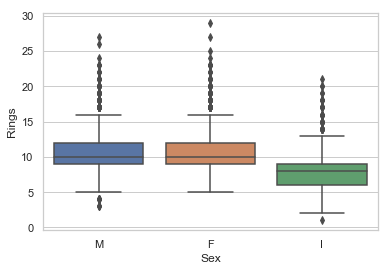

In [7]:
sns.boxplot(x="Sex", y="Rings", data=abalone_data)

### Rings v. Numeric variables

1. There is significant positive relationship between Rings and Length
2. There is significant positive relationship between Rings and Diameter
3. There is significant positive relationship between Rings and Height
4. Apprently, there are a few outliners on the 3rd chart. We should remove them after validation. 

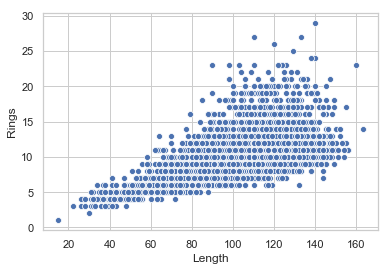

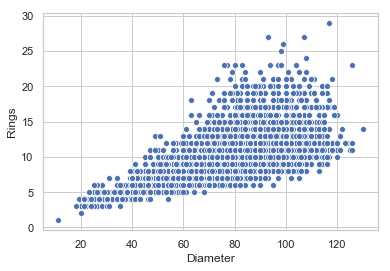

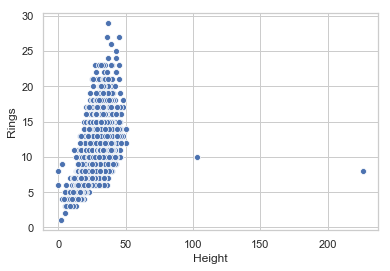

In [8]:
ax =  sns.scatterplot(x=abalone_data.Length, y=abalone_data.Rings)
plt.figure()
ax =  sns.scatterplot(x=abalone_data.Diameter, y=abalone_data.Rings)
plt.figure()
ax =  sns.scatterplot(x=abalone_data.Height, y=abalone_data.Rings)


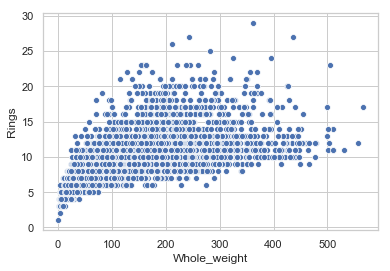

In [9]:
ax =  sns.scatterplot(x=abalone_data.Whole_weight, y=abalone_data.Rings)
plt.figure()

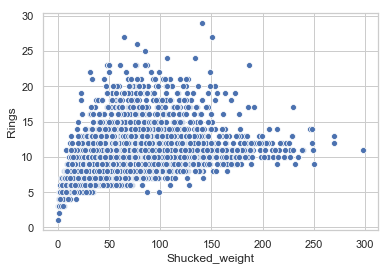

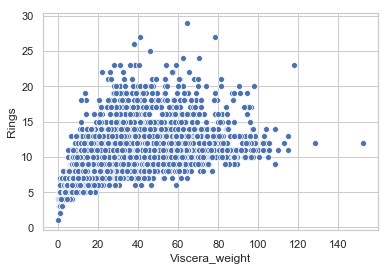

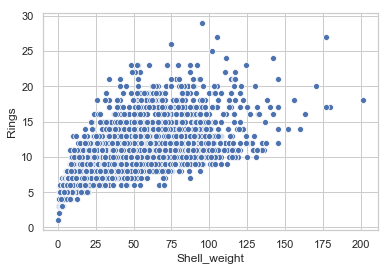

In [10]:
ax =  sns.scatterplot(x=abalone_data.Shucked_weight, y=abalone_data.Rings)
plt.figure()
ax =  sns.scatterplot(x=abalone_data.Viscera_weight, y=abalone_data.Rings)
plt.figure()
ax =  sns.scatterplot(x=abalone_data.Shell_weight, y=abalone_data.Rings)

### Correlation Matrix

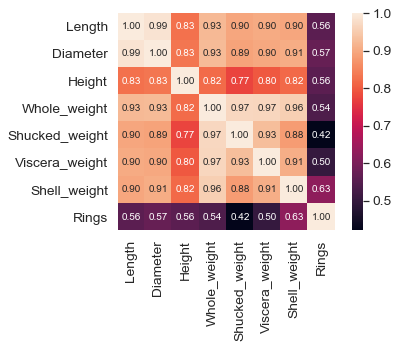

In [11]:
corrmat = abalone_data.corr()
sns.set(font_scale=1.25)
hm = sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.show()

1. All variables are correlated with 'Rings', and 'Shell_Weight' has the highest correlation. 
2. 'Length' and 'Diameter' are strongly correlated variables. Therefore, we just need one of these variables in our analysis
3. 'Shucked_weight' and 'Viscera_weight' are also strongly correlated to each other. Therefore, we just need one of these variables in our analysis. I would keep Viscera_weight as its correlation to Rings is higher. 


### Ring v. Shell Weight By Sex

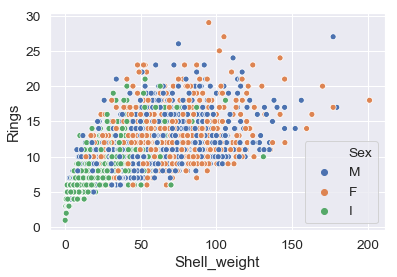

In [17]:
plt.figure()
ax =  sns.scatterplot(x=abalone_data.Shell_weight, y=abalone_data.Rings, hue = abalone_data.Sex)

## Infant Only
### Ring v. Shell Weight, Infant Only

To have a better understanding of the relationship between Rings to other numberic variables, I would like to remove the impact of "Sex". Below analysis is using Infant data only.  

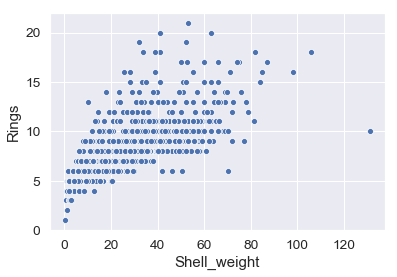

In [24]:
abalone_data_I = abalone_data.loc[abalone_data.Sex == "I"]
plt.figure()
ax =  sns.scatterplot(x=abalone_data_I.Shell_weight, y=abalone_data_I.Rings)

### Correlation Matrix 

For infants only, the correlation between Rings and other variables are higher. 

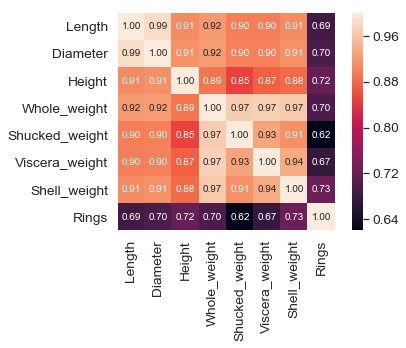

In [25]:
corrmat = abalone_data_I.corr()
sns.set(font_scale=1.25)
hm = sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.show()